In [189]:
import pandas as pd
import matplotlib.pyplot as plots
import numpy as np
# district vs race
# race vs time in pd

In [190]:
officer_df = pd.read_csv("../all_data/data/unified_data/profiles/officer-profiles.csv.gz", compression = 'gzip')
officer_df

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UID,first_name,last_name,middle_initial,middle_initial2,suffix_name,birth_year,race,gender,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank,link_UID
0,100001,A,BRODERSON,F,NaN,NaN,1926.0,WHITE,MALE,1950-06-03,1980-03-10,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,2863.0
1,100002,A,DALESSANDRO,A,NaN,NaN,1923.0,WHITE,MALE,1956-09-01,1979-10-18,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,6100.0
2,100003,A,KIBURAS,J,NaN,NaN,1948.0,WHITE,MALE,1968-06-24,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,14560.0
3,100004,A,KUSTRA,J,NaN,NaN,1923.0,WHITE,MALE,1953-09-28,1980-10-01,0.0,NaN,NaN,NaN,NaN,NaN,3,NaN,15445.0
4,100005,A,MC LAUGHLIN,R,NaN,NaN,1941.0,BLACK,MALE,1966-06-20,1986-09-16,0.0,NaN,123.0,POLICE OFFICER,NaN,NaN,3,POLICE OFFICER,18373.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33688,133689,NaN,NaN,L,NaN,NaN,1963.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33699.0
33689,133690,NaN,NaN,NaN,NaN,NaN,1951.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0,NaN,NaN,NaN,1,NaN,33700.0
33690,133691,NaN,NaN,L,NaN,NaN,1980.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,1,NaN,33701.0
33691,133692,NaN,NaN,P,NaN,NaN,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,123.0,NaN,NaN,NaN,1,NaN,33702.0


In [191]:
# Data Cleaning - Removing unnecessary columns and null values

cleaned_cols = officer_df.loc[:, ["UID", "first_name", "last_name", "middle_initial", "race", "gender", "appointed_date", "resignation_date", "cleaned_rank"]]
officers_cleaned = cleaned_cols.loc[cleaned_cols.race.notnull() & cleaned_cols.appointed_date.notnull() & cleaned_cols.resignation_date.notnull() & cleaned_cols.last_name.notnull() & cleaned_cols.first_name.notnull()]
officers_cleaned


,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,NaN
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,NaN
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,NaN
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,NaN
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,POLICE OFFICER
...,...,...,...,...,...,...,...,...,...
32513,132514,KEVIN,TAYLOR,NaN,BLACK,MALE,2007-11-01,2014-05-22,NaN
32514,132515,MERCEDES,WATSON,M,BLACK,FEMALE,2005-09-16,2011-01-21,NaN
32515,132516,DWIGHT,WHITE,A,BLACK,MALE,2007-11-01,2011-07-18,NaN
33055,133056,RONY,MAMMOO,D,WHITE,MALE,2017-11-16,2012-08-16,NaN


In [192]:
def years_as_officer(row):
    
    # Function that takes in a row as an input, and outputs the total time an officer has been working
    
    appointed_date = row['appointed_date']
    resigned_date = row['resignation_date']
    
    appointed_year = int(appointed_date[:4])
    appointed_month = int(appointed_date[5:7])
    appointed_day = int(appointed_date[8:10])
    
    resigned_year = int(resigned_date[:4])
    resigned_month = int(resigned_date[5:7])
    resigned_day = int(resigned_date[8:10])
    
    years = resigned_year - appointed_year
    months = years * 12
    
    days = 0
    if appointed_day == resigned_day:
        days = 1
    else:
        days = float(resigned_day + (31 - appointed_day)) / 31
    
    month_diff = resigned_month - appointed_month
    
    if month_diff >= 0 :
        months = months + month_diff - 1 + days
    else:
        years = years - 1
        months = years * 12
        months = (12 + months + month_diff)
        months = months - 1 + days
    return round((float(months) / 12), 2)

In [193]:
officers_cleaned["years_served"] = officers_cleaned.apply(years_as_officer, axis = 1) # Applying function to df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [194]:
new_officers_cleaned = officers_cleaned.loc[officers_cleaned.years_served > 0] # Officers who served more than 0 days
new_officers_cleaned

,UID,first_name,last_name,middle_initial,race,gender,appointed_date,resignation_date,cleaned_rank,years_served
0,100001,A,BRODERSON,F,WHITE,MALE,1950-06-03,1980-03-10,NaN,29.77
1,100002,A,DALESSANDRO,A,WHITE,MALE,1956-09-01,1979-10-18,NaN,23.13
2,100003,A,KIBURAS,J,WHITE,MALE,1968-06-24,1980-10-01,NaN,12.27
3,100004,A,KUSTRA,J,WHITE,MALE,1953-09-28,1980-10-01,NaN,27.01
4,100005,A,MC LAUGHLIN,R,BLACK,MALE,1966-06-20,1986-09-16,POLICE OFFICER,20.24
...,...,...,...,...,...,...,...,...,...,...
32511,132512,CHRISTIAN,SHIU,K,ASIAN/PACIFIC ISLANDER,MALE,2007-11-01,2012-12-11,NaN,5.11
32512,132513,JAMES,STEWART,J,BLACK,MALE,2006-04-28,2010-02-27,NaN,3.83
32513,132514,KEVIN,TAYLOR,NaN,BLACK,MALE,2007-11-01,2014-05-22,NaN,6.56
32514,132515,MERCEDES,WATSON,M,BLACK,FEMALE,2005-09-16,2011-01-21,NaN,5.35


In [195]:
# Separating officers from race

black_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "BLACK"]
white_officers = new_officers_cleaned.loc[new_officers_cleaned.race == "WHITE"]
other_officers = new_officers_cleaned.loc[(new_officers_cleaned.race != "BLACK") & (new_officers_cleaned.race != "WHITE")]

black_list = black_officers.years_served.tolist()
white_list = white_officers.years_served.tolist()
other_list = other_officers.years_served.tolist()

black_series = pd.Series(black_list)
white_series = pd.Series(white_list)
other_series = pd.Series(other_list)



Black Officer Statistics:
count    4779.000000
mean       22.144884
std        10.394190
min         0.010000
25%        16.000000
50%        25.160000
75%        29.775000
max        43.500000
dtype: float64


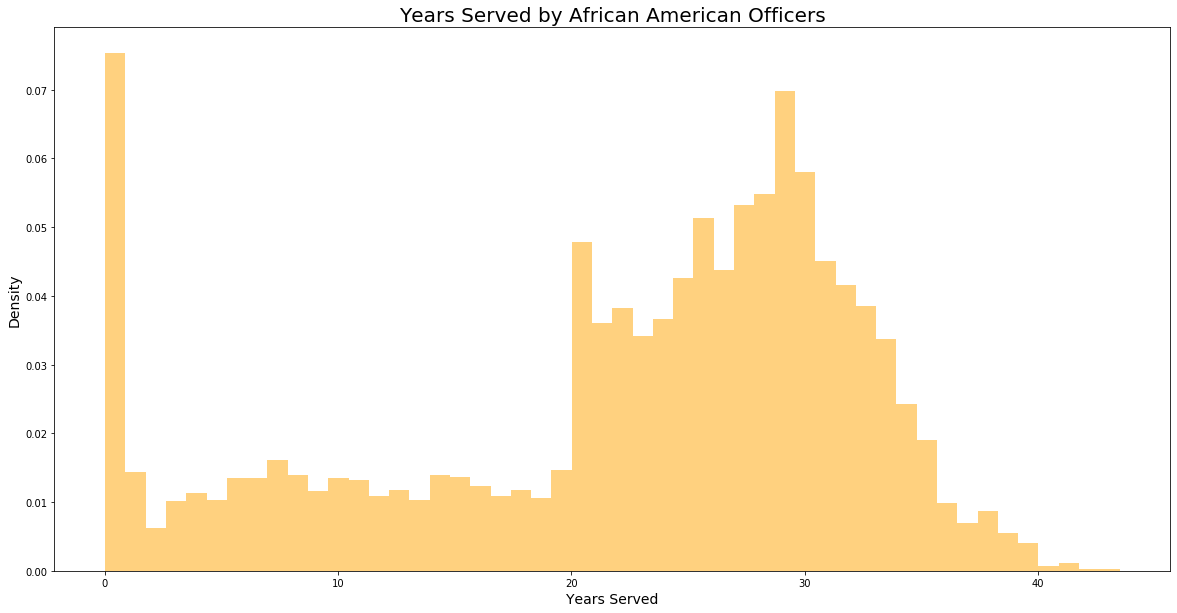

In [196]:
# Histogram of years served by African American officers

print('\033[1m' + "Black Officer Statistics:" + "\033[0;0m")
print(black_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(black_list, density = True, alpha = .5, color = 'orange', bins = 50, label = "African American")
plots.title("Years Served by African American Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

White Officer Statistics
count    13904.000000
mean        26.227102
std          9.831511
min          0.010000
25%         23.017500
50%         29.100000
75%         32.390000
max         46.120000
dtype: float64


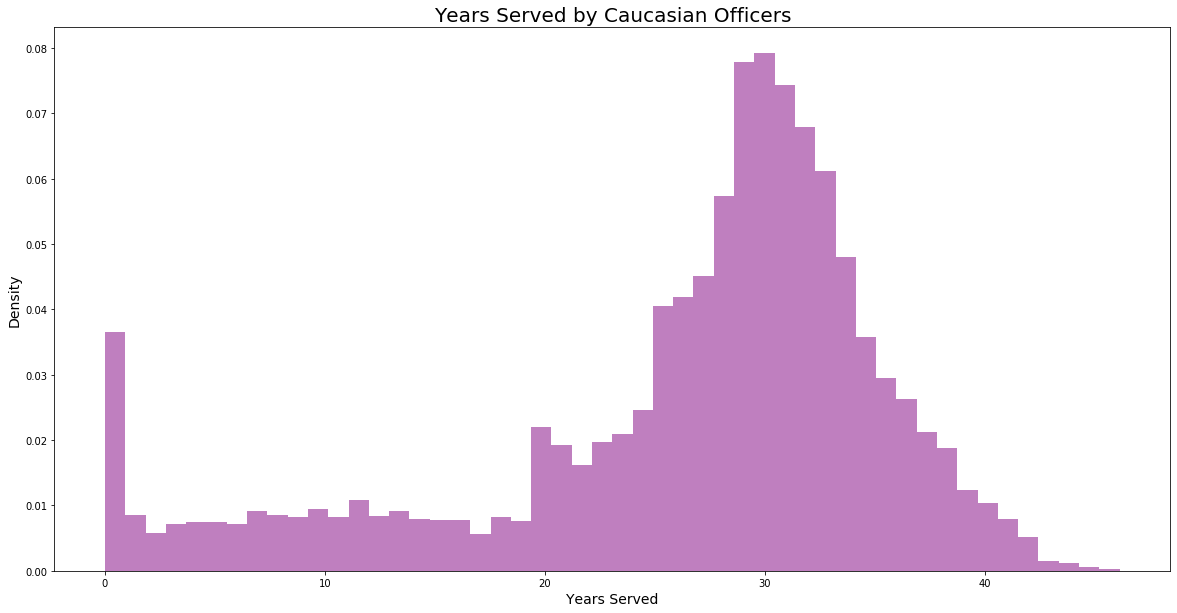

In [197]:
# Histogram of years served by Caucasian officers

print('\033[1m' + "White Officer Statistics" + "\033[0;0m")
print(white_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(white_list, density = True, alpha = .5, color = 'purple', bins = 50)
plots.title("Years Served by Caucasian Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Other Officer Statistics
count    1392.000000
mean       18.282407
std        11.694627
min         0.010000
25%         6.735000
50%        21.330000
75%        28.802500
max        41.760000
dtype: float64


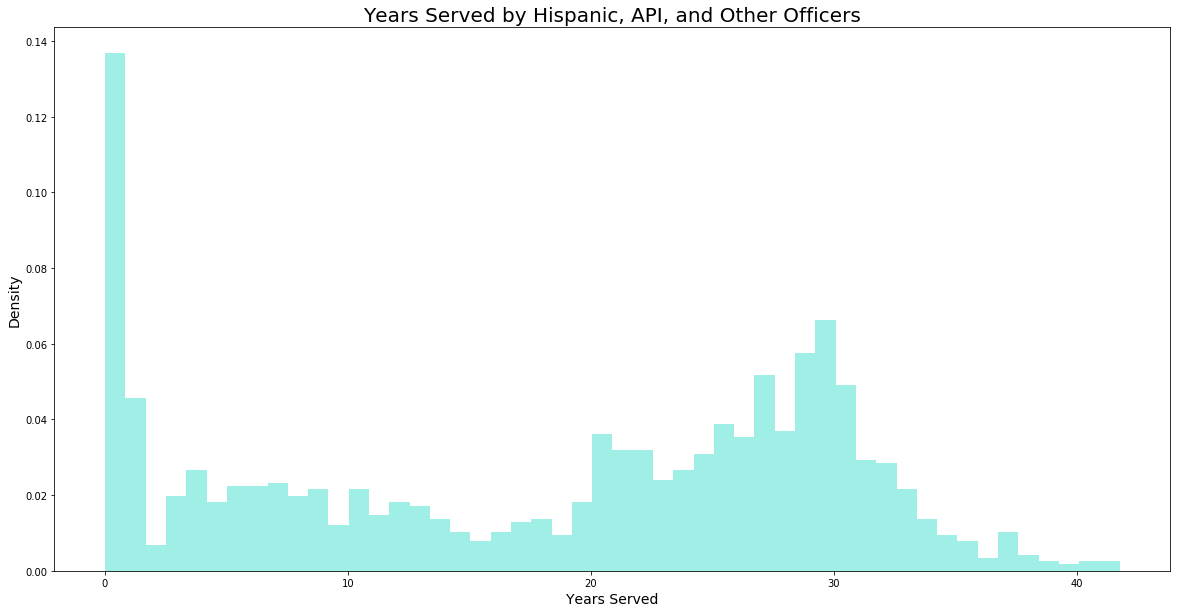

In [198]:
# Histogram of years served by Hispanic, API, and other officers

print('\033[1m' + "Other Officer Statistics" + "\033[0;0m")
print(other_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(other_list, density = True, alpha = .5, color = 'turquoise', bins = 50, label = "Other")
plots.title("Years Served by Hispanic, API, and Other Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

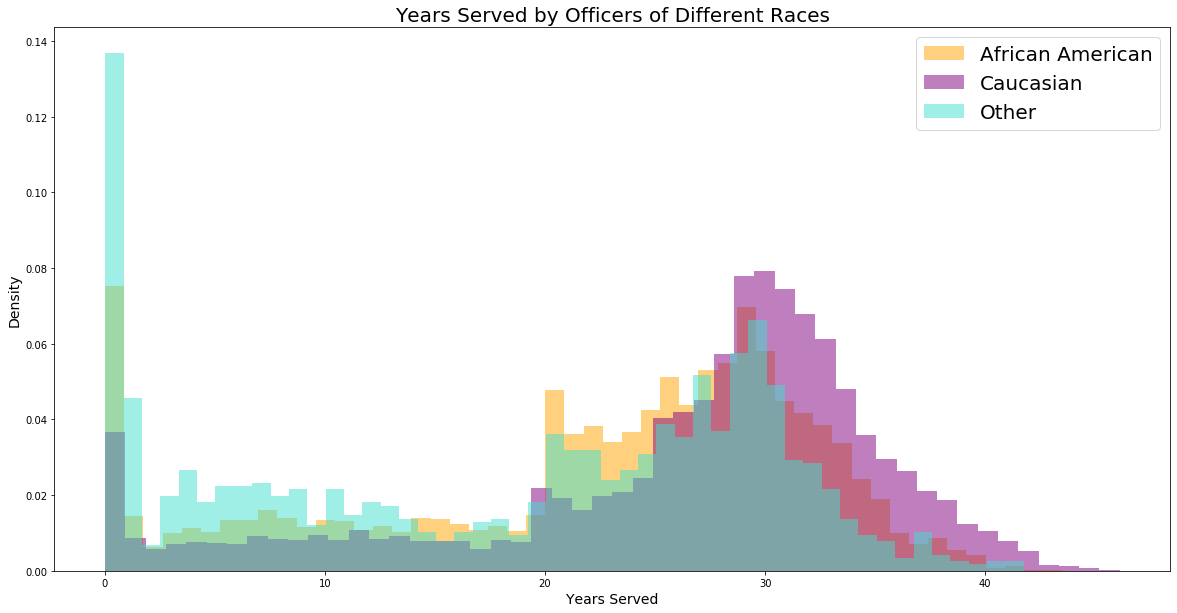

In [199]:
# Overlayed histogram of years served by officers of different races

plots.figure(figsize=(20, 10))
plots.hist(black_list, density = True, alpha = .5, color = 'orange', bins = 50, label = "African American")
plots.hist(white_list, density = True, alpha = .5, color = 'purple', bins = 50, label = "Caucasian")
plots.hist(other_list, density = True, alpha = .5, color = 'turquoise', bins = 50, label = "Hispanic/API")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Races", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

In [200]:
female_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "FEMALE"]
male_officers = new_officers_cleaned.loc[new_officers_cleaned.gender == "MALE"]

female_list = female_officers.years_served.tolist()
male_list = male_officers.years_served.tolist()

female_series = pd.Series(female_list)
male_series = pd.Series(male_list)

Male Officer Statistics:
count    17373.000000
mean        25.783353
std          9.995809
min          0.010000
25%         22.320000
50%         29.020000
75%         32.200000
max         46.120000
dtype: float64


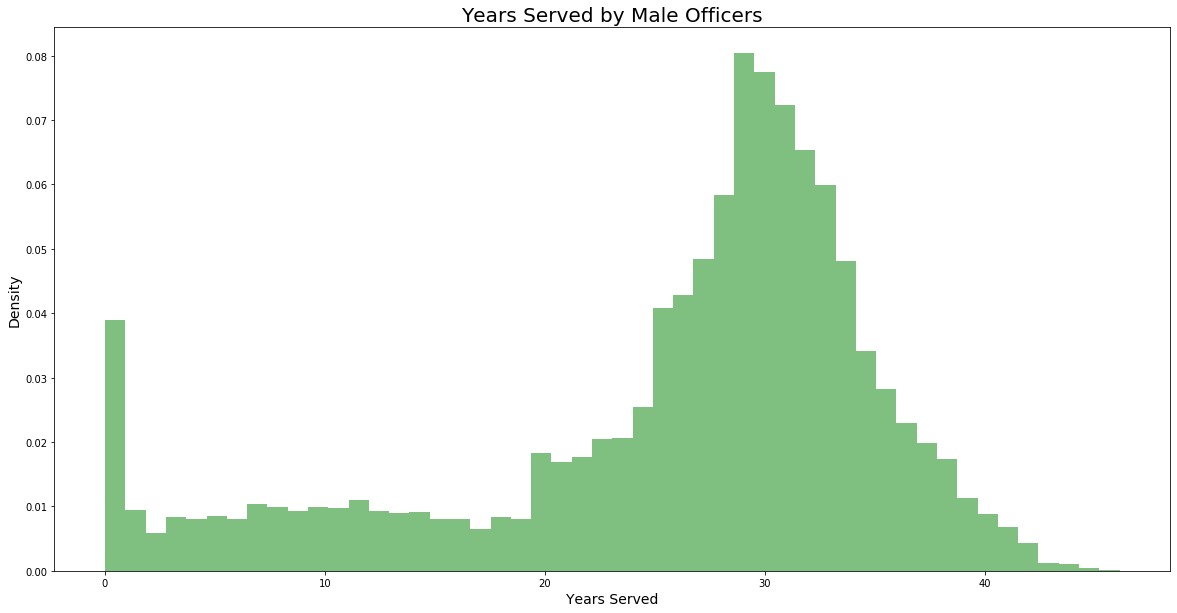

In [201]:
print('\033[1m' + "Male Officer Statistics:" + "\033[0;0m")
print(male_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(male_list, density = True, alpha = .5, color = 'green', bins = 50, label = "Male")
plots.title("Years Served by Male Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

Female Officer Statistics:
count    2702.000000
mean       17.767187
std        10.276584
min         0.010000
25%         8.535000
50%        20.645000
75%        25.580000
max        40.320000
dtype: float64


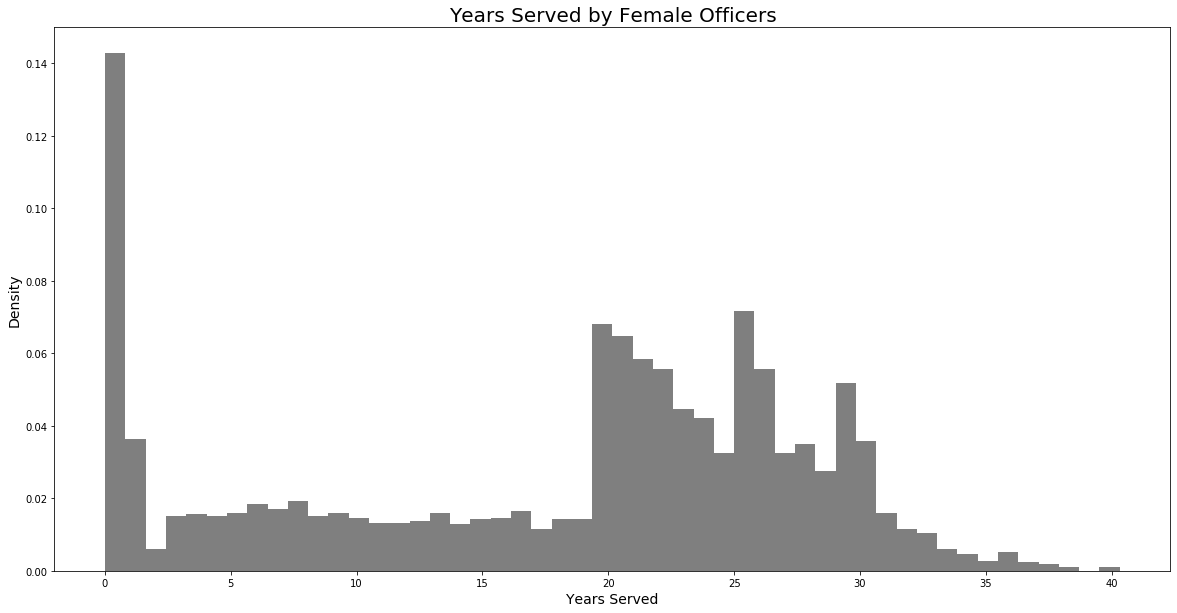

In [202]:
print('\033[1m' + "Female Officer Statistics:" + "\033[0;0m")
print(female_series.describe())

plots.figure(figsize=(20, 10))
plots.hist(female_list, density = True, alpha = .5, color = 'black', bins = 50, label = "Female")
plots.title("Years Served by Female Officers", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

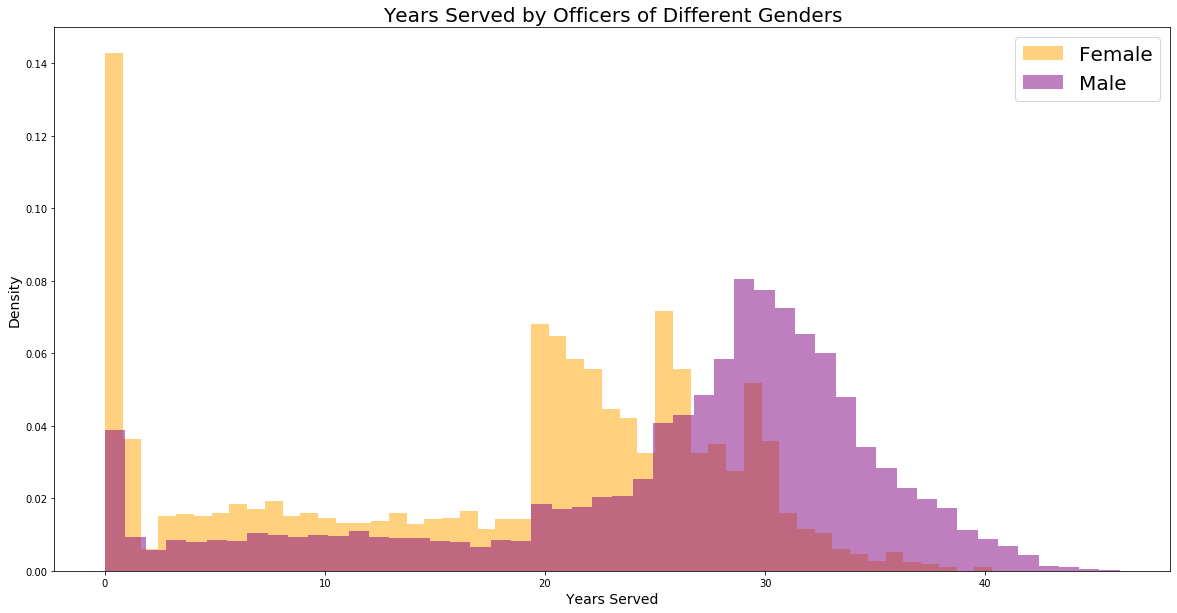

In [203]:
plots.figure(figsize=(20, 10))
plots.hist(female_list, density = True, alpha = .5, color = 'orange', bins = 50, label = "Female")
plots.hist(male_list, density = True, alpha = .5, color = 'purple', bins = 50, label = "Male")
plots.legend(loc = "upper right", prop={'size': 20})
plots.title("Years Served by Officers of Different Genders", size = 20)
plots.xlabel("Years Served", size = 14)
plots.ylabel("Density", size = 14)
plots.show()

In [204]:
complaints = pd.read_csv("../all_data/data/unified_data/complaints/complaints-complaints.csv.gz", compression = 'gzip')
complaints

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cr_id,cv,incident_date,complaint_date,closed_date,add1,add2,beat,city,full_address,location
0,1000194,2,2006-10-02,2006-10-02,NaN,7809,S SOUTH SHORE DR,421,CHICAGO IL,NaN,17
1,1000214,3,2006-10-03,2006-10-04,2010-12-23,7100,South WESTERN AVE,832,CHICAGO ILLINOIS 60636,NaN,NaN
2,1002796,3,2006-12-15,2007-01-18,2008-12-15,325,North JEFFERSON ST,1212,CHICAGO ILLINOIS 60661,NaN,TAVERN/LIQUOR STORE
3,1003786,3,2007-03-01,2007-03-02,2011-02-23,NaN,West 87TH ST,834,CHICAGO ILLINOIS 60652,NaN,RESIDENCE
4,1005070,2,2007-04-20,2007-04-20,NaN,4010,W ERIE ST,0,CHICAGO IL,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...
181407,C272173,1,2001-06-12,2001-06-14,2001-07-24,NaN,NaN,NaN,NaN,35** S MICHIGAN,NaN
181408,C272341,1,2001-06-19,2001-06-20,2001-07-25,NaN,NaN,NaN,NaN,119** S HALSTED,NaN
181409,C272342,1,2001-05-24,2001-06-20,2001-07-25,NaN,NaN,NaN,NaN,119** S HALSTED,NaN
181410,C273137,1,2001-07-16,2001-07-17,2001-08-01,NaN,NaN,NaN,NaN,79** S MARYLAND,NaN


In [205]:
complaints_against_officers = pd.read_csv("../all_data/data/unified_data/complaints/complaints-accused.csv.gz", compression = 'gzip')
complaints_against_officers



/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
0,130469.0,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0
1,103495.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0
2,111845.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,17149.0
3,126148.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,271.0
4,127906.0,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,11004.0
...,...,...,...,...,...,...,...,...,...,...
244431,117294.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,3,NS,NaN,NaN,NaN,29814.0
244432,107250.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,2909.0
244433,111277.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,3045.0
244434,128170.0,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,3,UN,NaN,NaN,NaN,4550.0


In [206]:
def uid_rounder(row):
    uid = row["UID"]
    return round(uid)

In [207]:
complaints_against_officers["UID"] = complaints_against_officers.apply(uid_rounder, axis = 1)
complaints_against_officers

,UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
0,130469,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COM...,12D,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,20040.0
1,103495,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,7727.0
2,111845,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,17149.0
3,126148,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,271.0
4,127906,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NaN,NaN,11004.0
...,...,...,...,...,...,...,...,...,...,...
244431,117294,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080732,3,NS,NaN,NaN,NaN,29814.0
244432,107250,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,2909.0
244433,111277,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1080819,3,NaN,NaN,NaN,NaN,3045.0
244434,128170,EXCESSIVE FORCE / ON DUTY - INJURY,05A,1082535,3,UN,NaN,NaN,NaN,4550.0


In [208]:
merged_complaints = complaints_against_officers.merge(new_officers_cleaned, on = "UID")

In [209]:
cleaned_merge_complaints = merged_complaints.loc[:, ["UID", "cr_id", "final_finding", "first_name", "last_name", "middle_initial", "race", "gender", "years_served"]]
cleaned_merge_complaints



,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served
0,130469,C170981,NS,WALTER,MURPHY,J,WHITE,MALE,40.42
1,130469,C198428,SU,WALTER,MURPHY,J,WHITE,MALE,40.42
2,130469,C210418,NS,WALTER,MURPHY,J,WHITE,MALE,40.42
3,130469,C237781,SU,WALTER,MURPHY,J,WHITE,MALE,40.42
4,103495,C170981,NS,CHARLES,EBERSPACHER,J,WHITE,MALE,24.19
...,...,...,...,...,...,...,...,...,...
108963,114956,1080062,NAF,JONATHAN,ROGERS,L,WHITE,MALE,3.43
108964,104713,1080340,NAF,DALLAS,ARAMBURU,P,HISPANIC,FEMALE,3.40
108965,104873,1081013,NaN,DANIEL,DUFRENE,,BLACK,MALE,0.41
108966,118711,276612,SU,MANUEL,PUENTE,NaN,HISPANIC,MALE,12.66


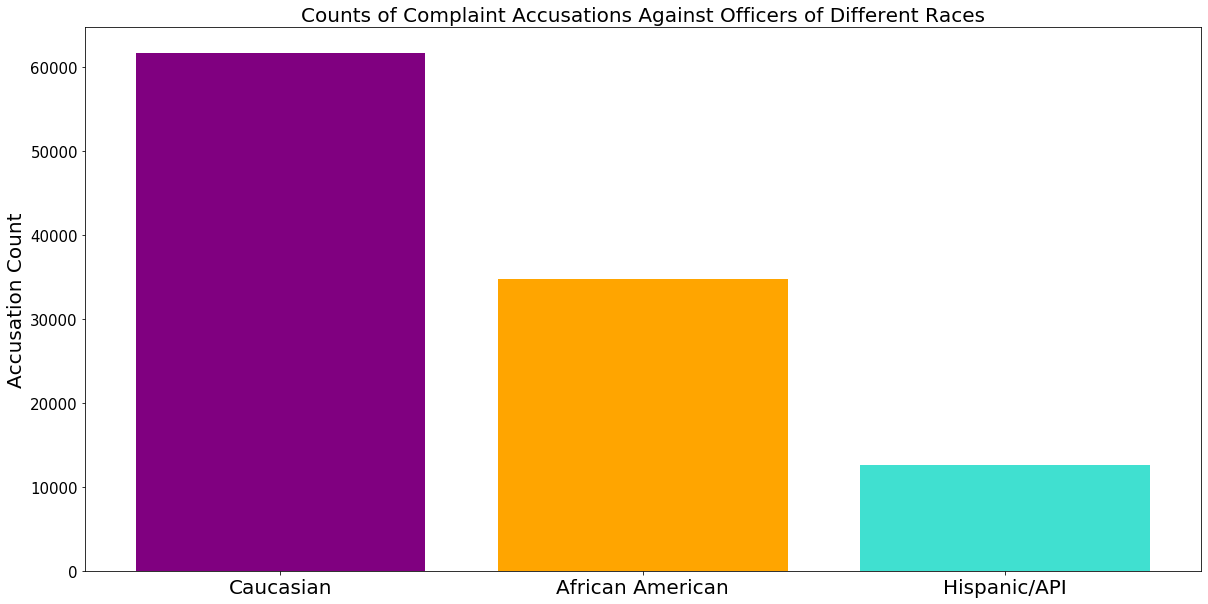

In [267]:
black_complaints = cleaned_merge_complaints.loc[cleaned_merge_complaints.race == "BLACK"]
white_complaints = cleaned_merge_complaints.loc[cleaned_merge_complaints.race == "WHITE"]
other_complaints = cleaned_merge_complaints.loc[(cleaned_merge_complaints.race != "BLACK") & (cleaned_merge_complaints.race != "WHITE")]

black_complaints_list = black_complaints.years_served.tolist()
white_complaints_list = white_complaints.years_served.tolist()
other_complaints_list = other_complaints.years_served.tolist()

black_complaints_series = pd.Series(black_complaints_list)
white_complaints_series = pd.Series(white_complaints_list)
other_complaints_series = pd.Series(other_complaints_list)

dictionary = {"Caucasian": len(white_complaints_list), "African American": len(black_complaints_list), "Hispanic/API": len(other_complaints_list)}

plots.figure(figsize=(20, 10))
plots.title("Counts of Complaint Accusations Against Officers of Different Races", size = 20)
plots.bar(list(dictionary.keys()), list(dictionary.values()), color = ["purple", "orange", "turquoise"])
plots.ylabel("Accusation Count", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()



In [211]:
dup_dropped = cleaned_merge_complaints.drop_duplicates("UID", keep="first")
dup_dropped

,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served
0,130469,C170981,NS,WALTER,MURPHY,J,WHITE,MALE,40.42
4,103495,C170981,NS,CHARLES,EBERSPACHER,J,WHITE,MALE,24.19
15,126148,C170981,NS,RONALD,ALBEE,W,WHITE,MALE,26.49
33,127906,C170981,NS,STERLING,GUNN,NaN,BLACK,MALE,19.99
54,117100,C171131,EX,KEVIN,RYAN,C,WHITE,MALE,4.12
...,...,...,...,...,...,...,...,...,...
108963,114956,1080062,NAF,JONATHAN,ROGERS,L,WHITE,MALE,3.43
108964,104713,1080340,NAF,DALLAS,ARAMBURU,P,HISPANIC,FEMALE,3.40
108965,104873,1081013,NaN,DANIEL,DUFRENE,,BLACK,MALE,0.41
108966,118711,276612,SU,MANUEL,PUENTE,NaN,HISPANIC,MALE,12.66


In [212]:
white_dropped = dup_dropped.loc[dup_dropped.race == "WHITE"].years_served.tolist()
black_dropped = dup_dropped.loc[dup_dropped.race == "BLACK"].years_served.tolist()
other_dropped = dup_dropped.loc[(dup_dropped.race != "WHITE") & (dup_dropped.race != "BLACK")].years_served.tolist()

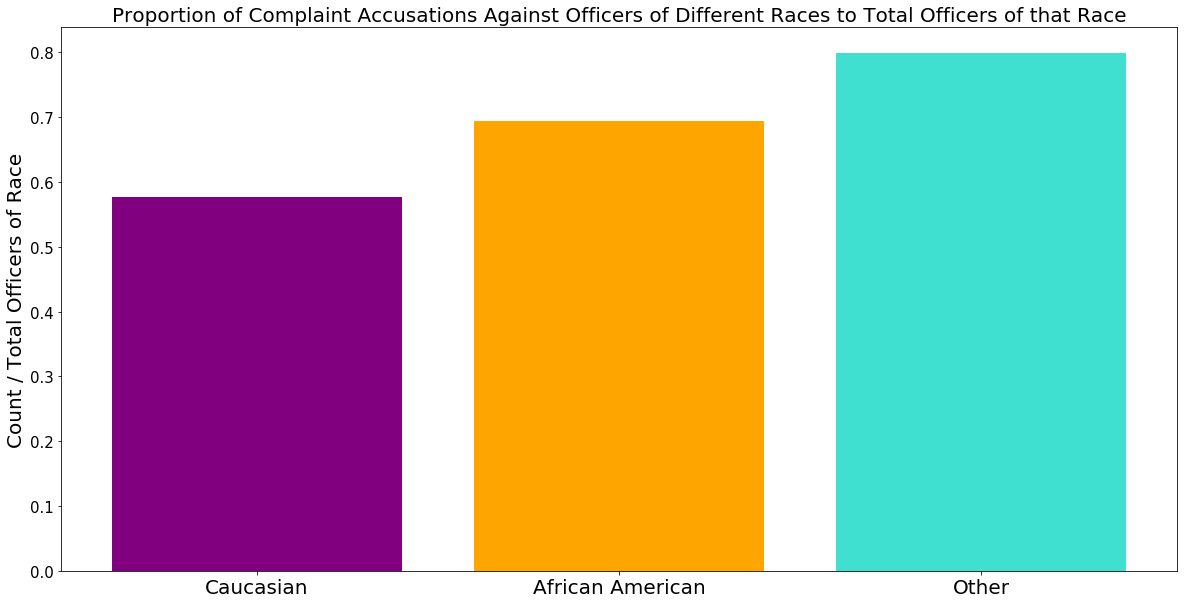

In [213]:
dictionary2 = {"Caucasian": float(len(white_dropped)) / float(len(white_list)), "African American": float(len(black_dropped)) / float(len(black_list)), "Hispanic/API": float(len(other_dropped)) / float(len(other_list))}
dictionary2

plots.figure(figsize=(20, 10))
plots.title("Proportion of Complaint Accusations Against Officers of Different Races to Total Officers of that Race", size = 20)
plots.bar(list(dictionary2.keys()), list(dictionary2.values()), color = ["purple", "orange", "turquoise"])
plots.ylabel("Count / Total Officers of Race", size = 20)
plots.xticks(fontsize = 20)
plots.yticks(fontsize = 15)
plots.show()

# no multiple complaints

In [217]:
print('\033[1m' + "Caucasian Accused Officer Years Served Stats:" + "\033[0;0m")
print(white_complaints_series.describe())

Caucasian Accused Officer Stats:
count    61651.00000
mean        26.17898
std          8.14182
min          0.02000
25%         22.02000
50%         28.21000
75%         31.24000
max         44.55000
dtype: float64


In [218]:
print('\033[1m' + "African American Accused Officer Years Served Stats:" + "\033[0;0m")
print(black_complaints_series.describe())

African American Accused Officer Years Served Stats:
count    34727.000000
mean        23.338617
std          7.579531
min          0.020000
25%         20.130000
50%         25.020000
75%         29.010000
max         43.500000
dtype: float64


In [219]:
print('\033[1m' + "Hispanic/API Accused Officer Years Served Stats:" + "\033[0;0m")
print(other_complaints_series.describe())

Hispanic/API Accused Officer Years Served Stats:
count    12590.000000
mean        22.855341
std          8.353746
min          0.100000
25%         17.470000
50%         25.160000
75%         29.270000
max         41.760000
dtype: float64


In [221]:
victims = pd.read_csv("../all_data/data/unified_data/complaints/complaints-victims.csv.gz", compression = 'gzip')
victims = victims.loc[:, ["cr_id", "gender", "race"]]
victims = victims.rename(columns = {"gender": "victim_gender", "race": "victim_race"})
victims = victims.loc[victims.victim_race.notnull() & victims.victim_gender.notnull()]
complaints_profiles_merged = cleaned_merge_complaints.merge(victims, on = "cr_id")
complaints_profiles_merged.to_csv("complaints_and_years_served_merged.csv")
complaints_profiles_merged

,UID,cr_id,final_finding,first_name,last_name,middle_initial,race,gender,years_served,victim_gender,victim_race
0,100527,1005434,UN,ALFONZA,WYSINGER,NaN,BLACK,MALE,29.25,MALE,WHITE
1,100527,1005434,UN,ALFONZA,WYSINGER,NaN,BLACK,MALE,29.25,MALE,WHITE
2,111051,1005434,UN,JACKIE,CAMPBELL,NaN,BLACK,FEMALE,26.09,MALE,WHITE
3,111051,1005434,UN,JACKIE,CAMPBELL,NaN,BLACK,FEMALE,26.09,MALE,WHITE
4,102914,1031317,NS,CALVIN,GOUSMAN,A,BLACK,MALE,27.71,MALE,WHITE
...,...,...,...,...,...,...,...,...,...,...,...
15379,114956,1080062,NAF,JONATHAN,ROGERS,L,WHITE,MALE,3.43,MALE,BLACK
15380,114956,1080062,NAF,JONATHAN,ROGERS,L,WHITE,MALE,3.43,MALE,BLACK
15381,104713,1080340,NAF,DALLAS,ARAMBURU,P,HISPANIC,FEMALE,3.40,FEMALE,BLACK
15382,104873,1081013,NaN,DANIEL,DUFRENE,,BLACK,MALE,0.41,FEMALE,WHITE


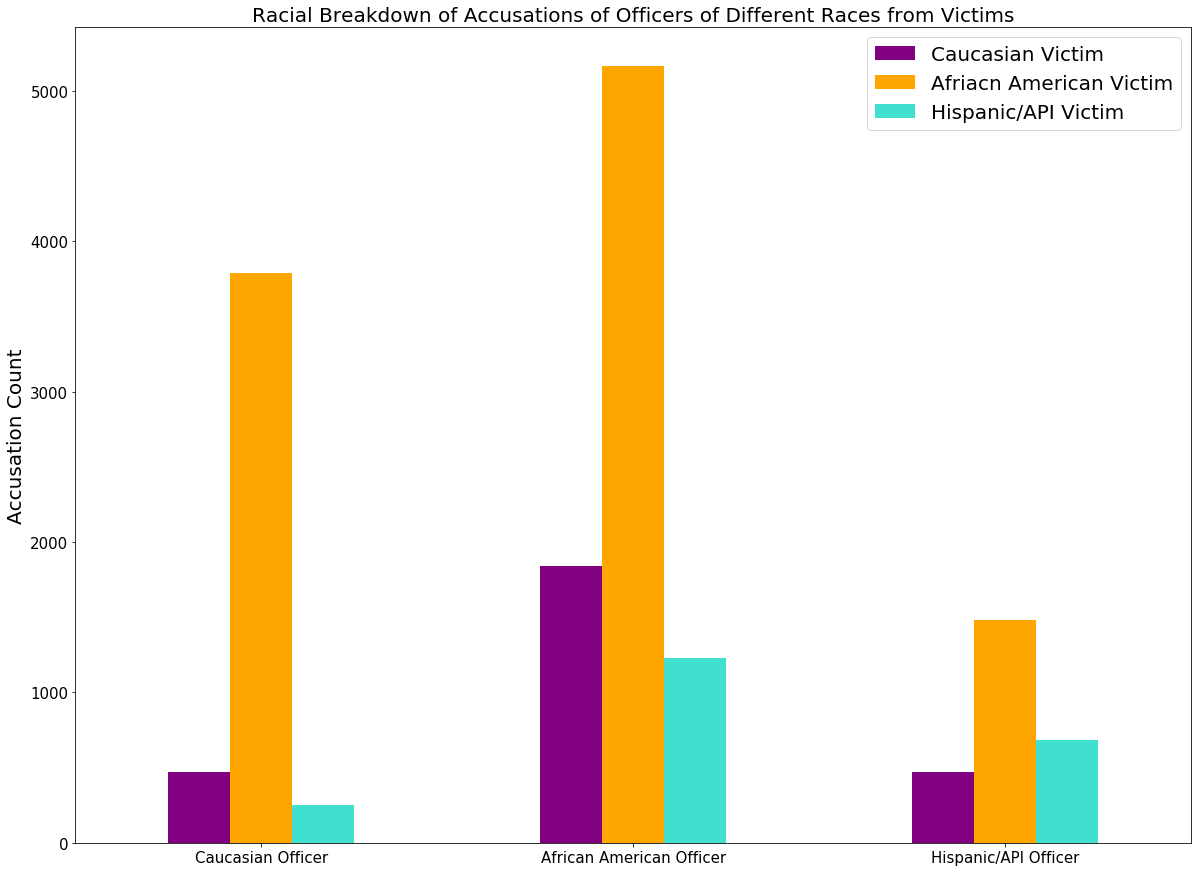

In [269]:
black_merged = complaints_profiles_merged.loc[complaints_profiles_merged.race == "BLACK"]
white_merged = complaints_profiles_merged.loc[complaints_profiles_merged.race == "WHITE"]
other_merged = complaints_profiles_merged.loc[(complaints_profiles_merged.race != "BLACK") & (complaints_profiles_merged.race != "WHITE")]

black_merged_list_b = black_merged.loc[black_merged.victim_race == "BLACK"]
white_merged_list_b = black_merged.loc[black_merged.victim_race == "WHITE"]
other_merged_list_b = black_merged.loc[(black_merged.victim_race != "BLACK") & (black_merged.victim_race != "WHITE")]

black_merged_list_w = white_merged.loc[white_merged.victim_race == "BLACK"]
white_merged_list_w = white_merged.loc[white_merged.victim_race == "WHITE"]
other_merged_list_w = white_merged.loc[(white_merged.victim_race != "BLACK") & (white_merged.victim_race != "WHITE")]

black_merged_list_o = other_merged.loc[other_merged.victim_race == "BLACK"]
white_merged_list_o = other_merged.loc[other_merged.victim_race == "WHITE"]
other_merged_list_o = other_merged.loc[(other_merged.victim_race != "BLACK") & (other_merged.victim_race != "WHITE")]

b_l = [len(black_merged_list_b), len(black_merged_list_w), len(black_merged_list_o)]
w_l = [len(white_merged_list_b), len(white_merged_list_w), len(white_merged_list_o)]
o_l = [len(other_merged_list_b), len(other_merged_list_w), len(other_merged_list_o)]
index = ["Caucasian Officer", "African American Officer", "Hispanic/API Officer"]

df = pd.DataFrame({'Caucasian Victim': w_l, "Afriacn American Victim": b_l, "Hispanic/API Victim": o_l}, index = index)
df.plot.bar(rot=0, figsize = (20, 15), color = ["purple", "orange", "turquoise"])
plots.title("Racial Breakdown of Accusations of Officers of Different Races from Victims", size = 20)
plots.legend(loc = "upper right", prop={'size': 20})
plots.ylabel("Accusation Count", size = 20)
plots.xticks(fontsize = 15)
plots.yticks(fontsize = 15)
plots.show()

